In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import community
from itertools import islice


C:\Users\z004bvhf\AppData\Local\Temp\ipykernel_10728\295413578.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [20]:
edges = pd.read_csv('datasets/KarateClub.csv', header=None, delimiter=';', names=['source', 'target'])
G = nx.from_pandas_edgelist(edges, 'source', 'target')

In [21]:
def draw_communities(G, communities, title):
    pos = nx.spring_layout(G)  # Rozložení uzlů
    plt.figure(figsize=(8, 8))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Barvy komunit
    for i, com in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=list(com), node_color=colors[i % len(colors)], label=f"Community {i}")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)  # Add this line to draw labels on nodes
    
    plt.title(title)
    plt.legend()
    plt.show()

In [40]:
def LouvainComms():
    louvain_coms = community.louvain.louvain_communities(G)
    modularity_score = community.louvain.modularity(G, louvain_coms)
    community_mapping = {}

    for community_id, com in enumerate(louvain_coms):
        for node in com:
            community_mapping[node] = community_id
    return louvain_coms,modularity_score,community_mapping

def LabelProComms():
    label_propagation_coms = list(community.label_propagation_communities(G))
    modularity_score = community.louvain.modularity(G, label_propagation_coms)
    community_mapping = {}
    
    for community_id, com in enumerate(label_propagation_coms):
        for node in com:
            community_mapping[node] = community_id
    return label_propagation_coms,modularity_score,community_mapping

def KernighanCommunities():

    community_1, community_2 = community.kernighan_lin_bisection(G)

    subcommunity_1a, subcommunity_1b = community.kernighan_lin_bisection(G.subgraph(community_1))
    subcommunity_2a, subcommunity_2b = community.kernighan_lin_bisection(G.subgraph(community_2))
    
    Kernighan_comm = [subcommunity_1a, subcommunity_1b, subcommunity_2a, subcommunity_2b]
    modularity_score = community.modularity(G, Kernighan_comm)
    community_mapping = {}

    for community_id, com in enumerate([community_1, community_2]):
        for node in com:
            community_mapping[node] = community_id

    return Kernighan_comm,modularity_score,community_mapping

def GirvanCommunities():
    girvan_newman_coms = next(islice(community.girvan_newman(G), 4, None))
    modularity_score = community.modularity(G, girvan_newman_coms)
    
    community_mapping = {}

    for community_id, com in enumerate(girvan_newman_coms):
        for node in com:
            community_mapping[node] = community_id
    return girvan_newman_coms,modularity_score,community_mapping

def KCliqueCommunities(k=4):
    # Výpočet k-clique komunit
    k_clique_coms = list(community.k_clique_communities(G, k))
    #modularity_score = community.modularity(G, k_clique_coms)

    community_mapping = {}
    for community_id, com in enumerate(k_clique_coms):
        for node in com:
            community_mapping[node] = community_id

    return k_clique_coms, k_clique_coms,community_mapping

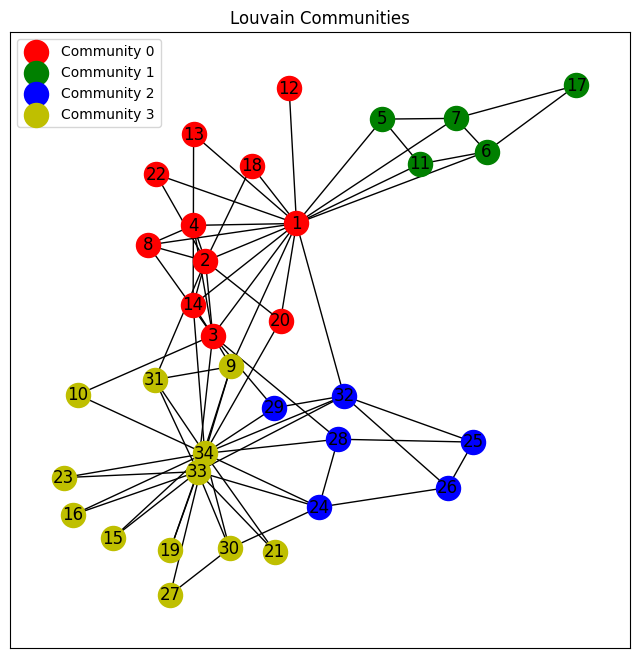

Modularity: 0.41978961209730437


In [6]:
louvain_coms,modularity_score,louvain_mapping = LouvainComms()
draw_communities(G,louvain_coms,'Louvain Communities')
print(f"Modularity: {modularity_score}")

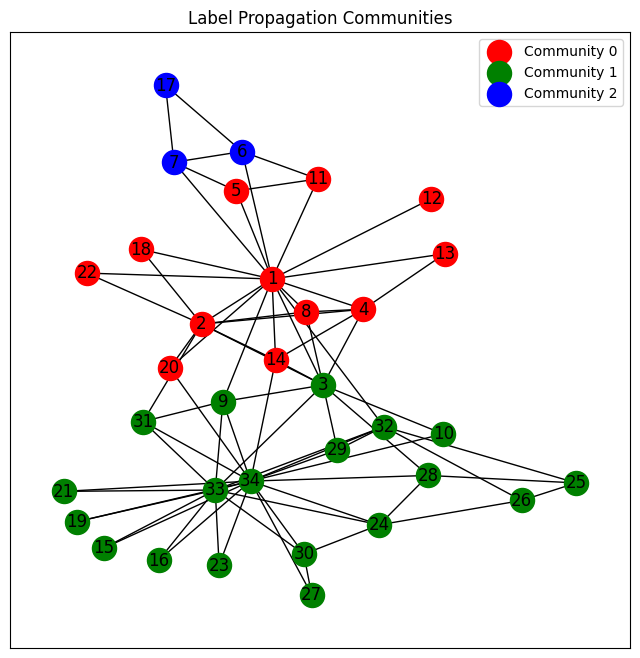

Modularity: 0.3547008547008546


In [7]:
label_coms,modularity_score,label_mapping = LabelProComms()
draw_communities(G,label_coms,'Label Propagation Communities')
print(f"Modularity: {modularity_score}")

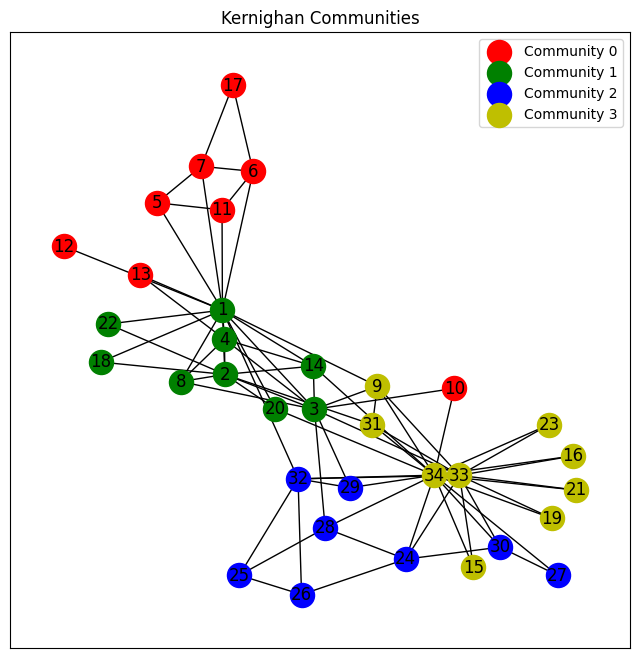

Modularity: 0.37056213017751477


In [8]:
kernighan_coms,modularity_score,kernighan_mapping = KernighanCommunities()
draw_communities(G,kernighan_coms,'Kernighan Communities')
print(f"Modularity: {modularity_score}")

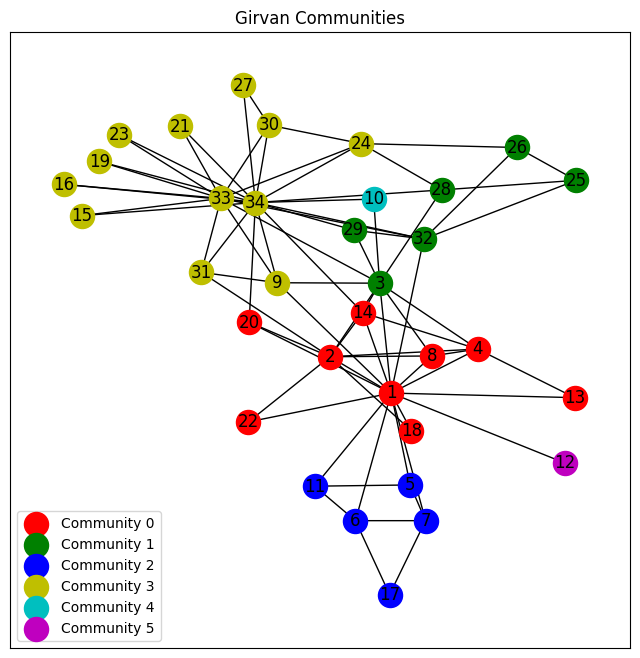

Modularity: 0.39250493096646943


In [9]:
girvan_coms,modularity_score,girvan_mapping = GirvanCommunities()
draw_communities(G,girvan_coms,'Girvan Communities')
print(f"Modularity: {modularity_score}")

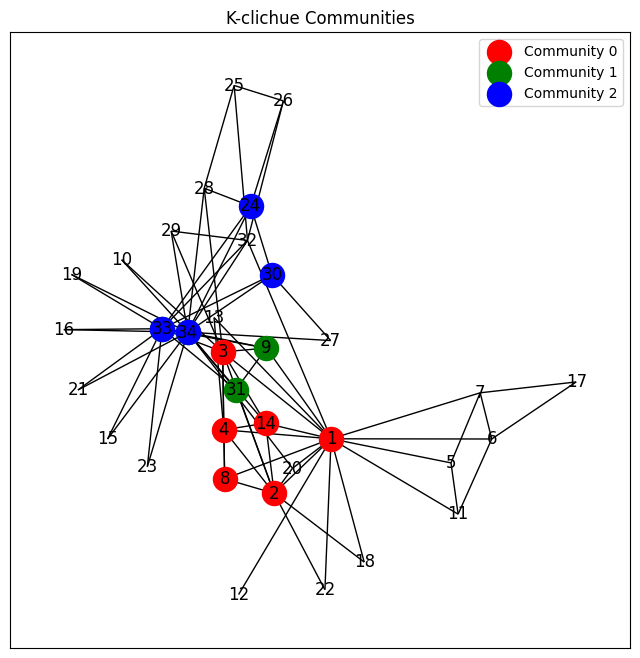

Modularity: 0.0


In [41]:
kClichue,neco,kCliche_mapping = KCliqueCommunities()
draw_communities(G,kClichue,'K-clichue Communities')
print(f"Modularity: {modularity_score}")

In [42]:
file1_df = pd.read_csv('result_cv3.csv', delimiter=';')

file1_df['louvain'] = file1_df['id'].map(louvain_mapping)
file1_df['label_propagation'] = file1_df['id'].map(label_mapping)
file1_df['kernighan'] = file1_df['id'].map(kernighan_mapping)
file1_df['girvan'] = file1_df['id'].map(girvan_mapping)
file1_df['k_clique'] = file1_df['id'].map(kCliche_mapping)

file1_df.to_csv('result_cv4.csv',sep=';',index=False)
